In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
os.getcwd()

'C:\\Users\\andre\\OneDrive\\Documents\\Machine Learning\\Projects'

In [3]:
df = pd.read_csv('cirrhosis.csv')
df

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [5]:
df.isna().sum()

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

There is no method where we can discover which drug was used on a patient or if the patient was part of the placebo group, hence I am going to drop the drugs where missing values are present.

In [6]:
df = df.dropna(subset=['Drug'])
df

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,308,1153,C,D-penicillamine,22347,F,N,Y,N,N,0.4,246.0,3.58,24.0,797.0,91.00,113.0,288.0,10.4,2.0
308,309,994,C,Placebo,21294,F,N,N,N,N,0.4,260.0,2.75,41.0,1166.0,70.00,82.0,231.0,10.8,2.0
309,310,939,C,D-penicillamine,22767,F,N,N,N,N,1.7,434.0,3.35,39.0,1713.0,171.00,100.0,234.0,10.2,2.0
310,311,839,C,D-penicillamine,13879,F,N,N,N,N,2.0,247.0,3.16,69.0,1050.0,117.00,88.0,335.0,10.5,2.0


In [7]:
df.isna().sum()

ID                0
N_Days            0
Status            0
Drug              0
Age               0
Sex               0
Ascites           0
Hepatomegaly      0
Spiders           0
Edema             0
Bilirubin         0
Cholesterol      28
Albumin           0
Copper            2
Alk_Phos          0
SGOT              0
Tryglicerides    30
Platelets         4
Prothrombin       0
Stage             0
dtype: int64

As the four remaining values are integer datatypes, I am going to impute the mean value for Cholesterol, Copper, Tryglicerides and Platelets.

In [8]:
mean_imputation_values = {'Cholesterol': df['Cholesterol'].mean(),
                          'Copper' : df['Copper'].mean(),
                          'Tryglicerides' : df['Tryglicerides'].mean(),
                          'Platelets' : df['Platelets'].mean()}

df = df.fillna(value=mean_imputation_values)
df

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,308,1153,C,D-penicillamine,22347,F,N,Y,N,N,0.4,246.0,3.58,24.0,797.0,91.00,113.0,288.0,10.4,2.0
308,309,994,C,Placebo,21294,F,N,N,N,N,0.4,260.0,2.75,41.0,1166.0,70.00,82.0,231.0,10.8,2.0
309,310,939,C,D-penicillamine,22767,F,N,N,N,N,1.7,434.0,3.35,39.0,1713.0,171.00,100.0,234.0,10.2,2.0
310,311,839,C,D-penicillamine,13879,F,N,N,N,N,2.0,247.0,3.16,69.0,1050.0,117.00,88.0,335.0,10.5,2.0


Evident below, the imputation has been successful. We can now begin exploratory data analysis to gain a deeper understanding for which variables are important.

In [9]:
df.isna().sum()

ID               0
N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

<Axes: >

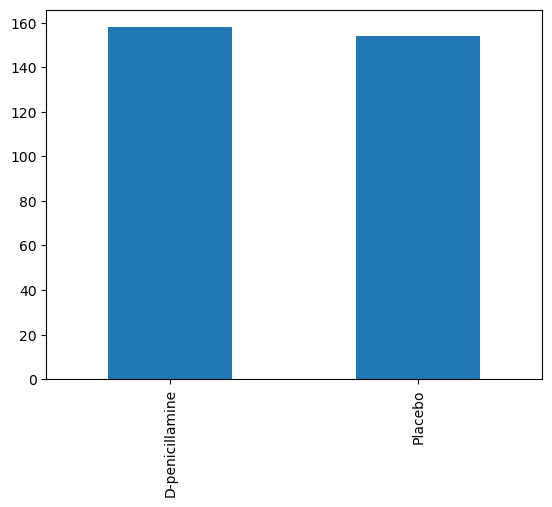

In [10]:
df['Drug'].value_counts().plot(kind='bar')

<Axes: xlabel='N_Days', ylabel='Count'>

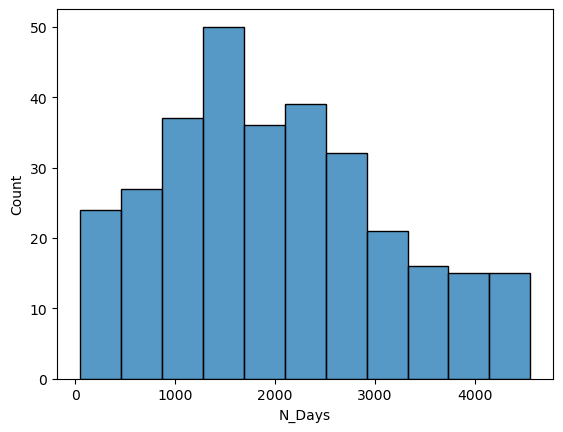

In [11]:
sns.histplot(df['N_Days'])

The Age column is the patients age in days. I will transform these values into years.

In [12]:
df['Age'] = round(df['Age'] * 0.0027378508,0).astype('int64')
df

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,59,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,56,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,70,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,55,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,38,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,308,1153,C,D-penicillamine,61,F,N,Y,N,N,0.4,246.0,3.58,24.0,797.0,91.00,113.0,288.0,10.4,2.0
308,309,994,C,Placebo,58,F,N,N,N,N,0.4,260.0,2.75,41.0,1166.0,70.00,82.0,231.0,10.8,2.0
309,310,939,C,D-penicillamine,62,F,N,N,N,N,1.7,434.0,3.35,39.0,1713.0,171.00,100.0,234.0,10.2,2.0
310,311,839,C,D-penicillamine,38,F,N,N,N,N,2.0,247.0,3.16,69.0,1050.0,117.00,88.0,335.0,10.5,2.0


<Axes: >

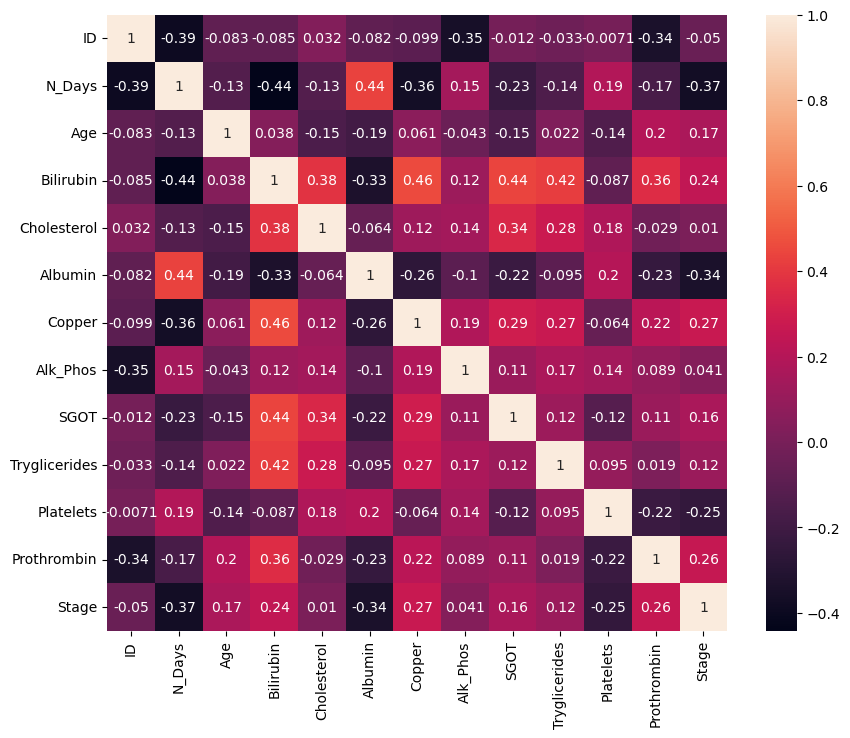

In [13]:
df_corr = df.corr(numeric_only=True)

plt.figure(figsize=(10,8))
sns.heatmap(df_corr,annot=True)

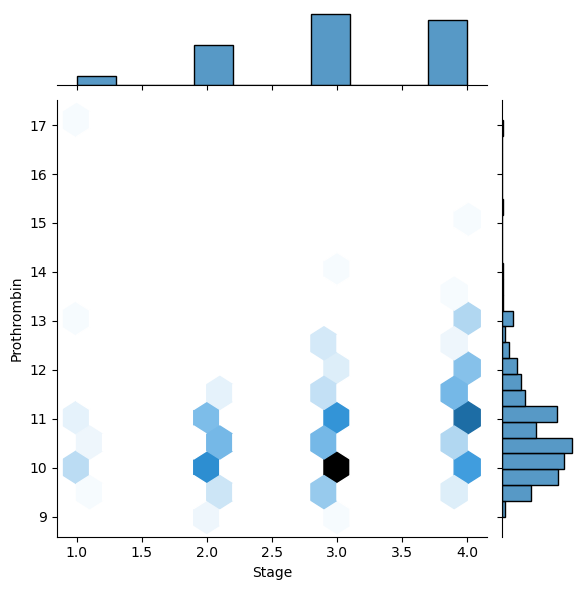

In [14]:
#Prothrombin and copper slightly correlated with stage. Let me inestigate further
sns.jointplot(data=df,x='Stage',y='Prothrombin',kind='hex')

#17 looks like it may be an outlier.
#When the PT is high, it takes longer for the blood to clot (17 seconds, for example). 
#This usually happens because the liver is not making the right amount of blood clotting proteins, 
#so the clotting process takes longer. A high PT usually means that there is serious liver damage or cirrhosis.

#May be worth removing this 'outlier' to improve model performance

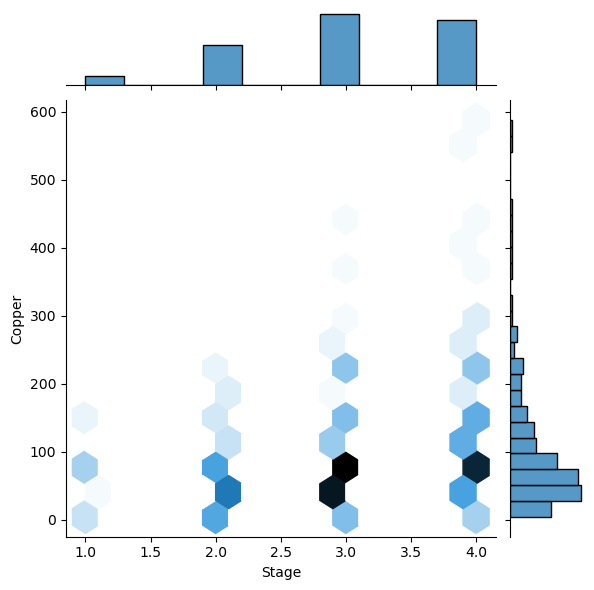

In [15]:
sns.jointplot(data=df,x='Stage',y='Copper',kind='hex')

<Axes: xlabel='Copper', ylabel='Count'>

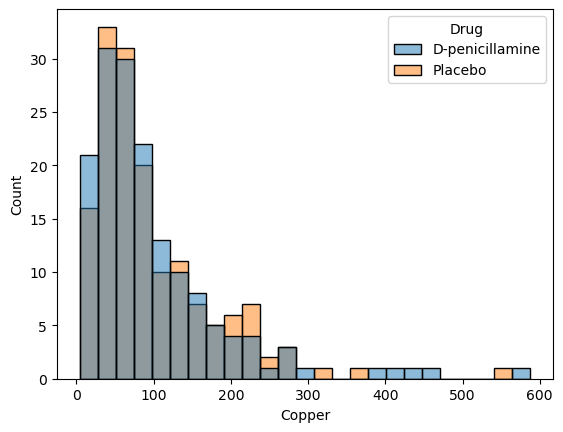

In [16]:
sns.histplot(data=df,x='Copper',hue='Drug')

<Axes: xlabel='Age', ylabel='count'>

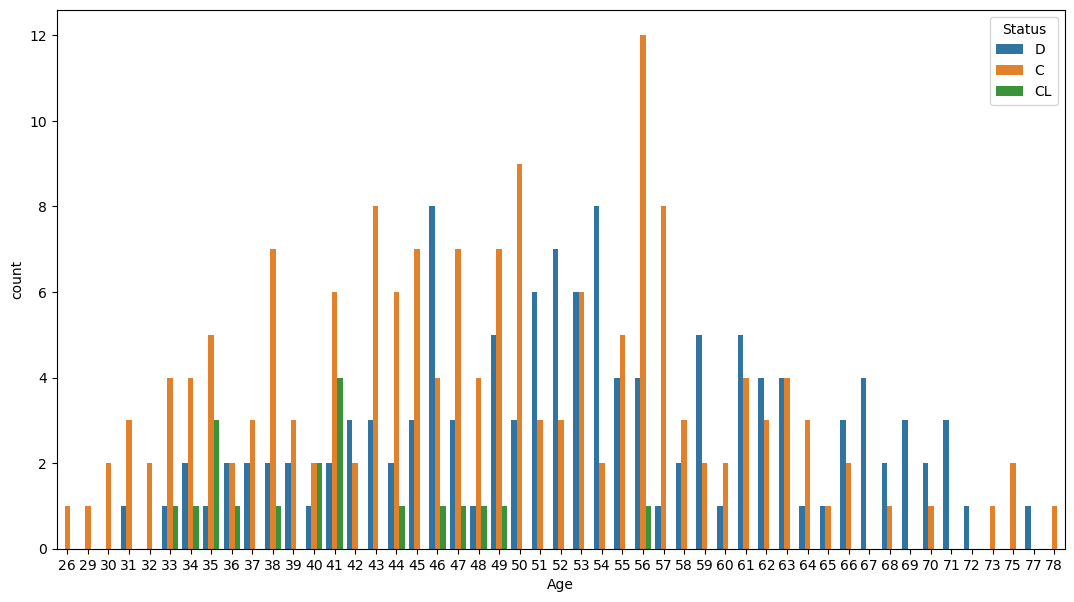

In [17]:
#Create a countplot to display the count of each stage per age
plt.figure(figsize=(13,7))
sns.countplot(data=df,x='Age',hue='Status')

#N

In [18]:
df

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,59,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,56,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,70,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,55,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,38,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,308,1153,C,D-penicillamine,61,F,N,Y,N,N,0.4,246.0,3.58,24.0,797.0,91.00,113.0,288.0,10.4,2.0
308,309,994,C,Placebo,58,F,N,N,N,N,0.4,260.0,2.75,41.0,1166.0,70.00,82.0,231.0,10.8,2.0
309,310,939,C,D-penicillamine,62,F,N,N,N,N,1.7,434.0,3.35,39.0,1713.0,171.00,100.0,234.0,10.2,2.0
310,311,839,C,D-penicillamine,38,F,N,N,N,N,2.0,247.0,3.16,69.0,1050.0,117.00,88.0,335.0,10.5,2.0


Create dummy variables

In [19]:
dummy_Drugdf = pd.get_dummies(df['Drug'],drop_first=True)
dummy_Sexdf = pd.get_dummies(df['Sex'],drop_first=True)
dummy_Ascitesdf = pd.get_dummies(df['Ascites'],drop_first=True)
dummy_Hepatodf = pd.get_dummies(df['Hepatomegaly'],drop_first=True)
dummy_Spidersdf = pd.get_dummies(df['Spiders'],drop_first=True)
dummy_Edemadf = pd.get_dummies(df['Edema'],drop_first=True)

df = pd.concat([df, dummy_Drugdf, dummy_Sexdf, dummy_Ascitesdf, dummy_Hepatodf, dummy_Spidersdf, dummy_Edemadf],
              axis=1,join='outer')

df = df.drop(columns=['Drug','Sex','Ascites','Hepatomegaly','Spiders','Edema'])
df

,ID,N_Days,Status,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,...,Platelets,Prothrombin,Stage,Placebo,M,Y,Y,Y,S,Y
0,1,400,D,59,14.5,261.0,2.60,156.0,1718.0,137.95,...,190.0,12.2,4.0,0,0,1,1,1,0,1
1,2,4500,C,56,1.1,302.0,4.14,54.0,7394.8,113.52,...,221.0,10.6,3.0,0,0,0,1,1,0,0
2,3,1012,D,70,1.4,176.0,3.48,210.0,516.0,96.10,...,151.0,12.0,4.0,0,1,0,0,0,1,0
3,4,1925,D,55,1.8,244.0,2.54,64.0,6121.8,60.63,...,183.0,10.3,4.0,0,0,0,1,1,1,0
4,5,1504,CL,38,3.4,279.0,3.53,143.0,671.0,113.15,...,136.0,10.9,3.0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,308,1153,C,61,0.4,246.0,3.58,24.0,797.0,91.00,...,288.0,10.4,2.0,0,0,0,1,0,0,0
308,309,994,C,58,0.4,260.0,2.75,41.0,1166.0,70.00,...,231.0,10.8,2.0,1,0,0,0,0,0,0
309,310,939,C,62,1.7,434.0,3.35,39.0,1713.0,171.00,...,234.0,10.2,2.0,0,0,0,0,0,0,0
310,311,839,C,38,2.0,247.0,3.16,69.0,1050.0,117.00,...,335.0,10.5,2.0,0,0,0,0,0,0,0


In [20]:
Status_map = {'D' : 'Death',
              'C' : 'Censored',
              'CL' : 'Censored Due To Liver Transplantation'}
df = df.replace(Status_map)
df['Status'].value_counts()

Censored                                 168
Death                                    125
Censored Due To Liver Transplantation     19
Name: Status, dtype: int64

In [21]:
Status_map1 = {'Censored Due To Liver Transplantation' : 'Censored'}

df = df.replace(Status_map1)
df['Status'].value_counts()

Censored    187
Death       125
Name: Status, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X = df.drop(columns = 'Status',axis=1)
y = df['Status']

In [24]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.31, random_state=101)

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
logmodel = LogisticRegression()

In [42]:
logmodel.fit(X_train,y_train)

C:\Users\andre\downloads\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Predictions and Evaluations

In [43]:
predictions = logmodel.predict(X_test)

In [44]:
from sklearn.metrics import classification_report, confusion_matrix

In [45]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

    Censored       0.89      0.93      0.91        60
       Death       0.88      0.81      0.85        37

    accuracy                           0.89        97
   macro avg       0.89      0.87      0.88        97
weighted avg       0.89      0.89      0.89        97

[[56  4]
 [ 7 30]]


In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [58]:
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f" {name} Classification Report:")
    print(f"{classification_report(y_test,y_pred)}")
    print("--------------------------")


C:\Users\andre\downloads\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 Logistic Regression Classification Report:
              precision    recall  f1-score   support

    Censored       0.89      0.93      0.91        60
       Death       0.88      0.81      0.85        37

    accuracy                           0.89        97
   macro avg       0.89      0.87      0.88        97
weighted avg       0.89      0.89      0.89        97

--------------------------
 Decision Tree Classification Report:
              precision    recall  f1-score   support

    Censored       0.79      0.77      0.78        60
       Death       0.64      0.68      0.66        37

    accuracy                           0.73        97
   macro avg       0.72      0.72      0.72        97
weighted avg       0.74      0.73      0.73        97

--------------------------
 Random Forest Classification Report:
              precision    recall  f1-score   support

    Censored       0.84      0.85      0.84        60
       Death       0.75      0.73      0.74        37

    accu

In [ ]:
# logistic regression performs the best